2025-03-29 00:50:22.204023: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-29 00:50:22.207119: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-29 00:50:22.214980: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743177022.226818   18235 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743177022.230212   18235 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743177022.241242   18235 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Train Data - Image Shape: (32, 28, 28, 1)
Train Data - Label Shape: (32,)
Epoch 1/5


2025-03-29 00:50:24.923628: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-03-29 00:50:25.039481: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-03-29 00:50:25.059918: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/home/seokwoo/anaconda3/envs/tf1/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21811/21811 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.7084 - loss: 1.0127
Epoch 2/5
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.7879 - loss: 0.6598
Epoch 3/5
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.7953 - loss: 0.6349
Epoch 4/5
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.7983 - loss: 0.6223
Epoch 5/5
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.7998 - loss: 0.6170
3636/3636 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8179 - loss: 0.5306
Test accuracy: 0.8184452056884766
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18m

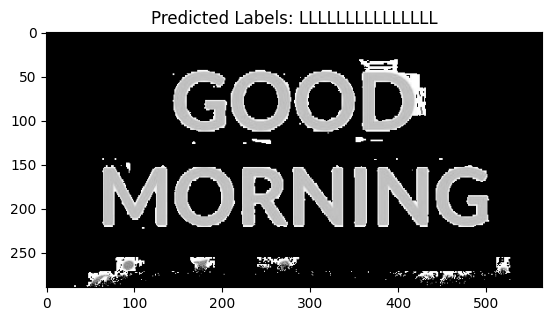

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# EMNIST 데이터셋 로드
dataset, info = tfds.load("emnist", with_info=True, as_supervised=True)

# 훈련 데이터와 테스트 데이터로 나누기
train_data, test_data = dataset['train'], dataset['test']

# 데이터 전처리 함수 (정규화)
def preprocess(image, label):
    image = tf.cast(image, tf.float32)  # 이미지 타입을 float32로 변환
    image = image / 255.0  # 이미지 정규화 (0~1 범위)
    image = tf.reshape(image, (28, 28, 1))  # 28x28 크기로 리사이즈
    return image, label

# 데이터셋에 전처리 함수 적용 (배치 크기 32로 묶기)
train_data = train_data.map(preprocess).batch(32)
test_data = test_data.map(preprocess).batch(32)

# 데이터셋에 전처리 함수 적용
for image, label in train_data.take(1):
    print("Train Data - Image Shape:", image.shape)
    print("Train Data - Label Shape:", label.shape)

# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),  # 배치 크기를 제외한 (28, 28) 이미지 크기만 설정
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(86, activation='softmax')  # EMNIST는 86개의 클래스 (A-Z, 0-9, 기타 문자)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(train_data, epochs=5)

# 테스트 데이터로 성능 평가
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc}")

# 이미지에서 여러 개의 알파벳을 인식
def predict_multiple_characters(image_path):
    # 이미지 로드 및 전처리
    img = Image.open(image_path).convert('L')  # 흑백으로 변환
    img = np.array(img)
    
    # 이미지 전처리 (이진화)
    _, img_bin = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
    
    # 글자 분리 (연결된 부분을 찾고 분리하기)
    contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # 각 글자마다 예측하기
    predicted_labels = []
    for contour in contours:
        # 바운딩 박스를 찾고 자르기
        x, y, w, h = cv2.boundingRect(contour)
        letter = img_bin[y:y+h, x:x+w]
        
        # 이미지를 28x28 크기로 리사이즈
        letter = cv2.resize(letter, (28, 28))
        letter = np.reshape(letter, (1, 28, 28))  # 배치 차원 추가
        
        # 예측
        letter = letter / 255.0  # 정규화
        prediction = model.predict(letter)
        predicted_label = np.argmax(prediction)  # 예측된 알파벳
        
        predicted_labels.append(chr(predicted_label + ord('A')))  # 알파벳으로 변환
    
    return predicted_labels

# 이미지 경로를 넣고 여러 알파벳 예측하기
image_path = '/home/seokwoo/Desktop/RealSWoo/emnist/emnist/pngwing.png'
predicted_labels = predict_multiple_characters(image_path)

print(f"Predicted Labels: {''.join(predicted_labels)}")

# 이미지 시각화
img = Image.open(image_path).convert('L')
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Labels: {''.join(predicted_labels)}")
plt.show()